# Predicting Diabetes Patient Readmission

# Background
It was reported that in 2011 more than 3.3 million patients were readmitted in the US within 30 days of being ### discharged, and they were associated with about 
41 billion in hospital costs. The need for readmission indicates that inadequate care #### was provided to the #### patient at the time of first admission. The readmission rate has become an important metric measuring the overall quality of a hospital.

Diabetes is the 7th leading cause of death and affects about 23.6 million people in the US. 1.4 million Americans are diagnosed with diabetes every year. Hospital readmission being a major concern in diabetes care, over 250 million dollars was spent on treatment of readmitted diabetic patients in 2011. Early identification of patients facing a high risk of readmission can enable healthcare providers to conduct additional investigations and possibly prevent future readmissions.

In this project, I build a machine learning classifier model to predict diabetes patients with high risk of readmission. Note that higher sensitivity (recall) is more desirable for hospitals because it is more crucial to correctly identify "high risk" patients who are likely to be readmitted than identifying "low risk" patients.

# Dataset Description
The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes 50 features representing 101766 diabetes patients and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria:

It is an inpatient encounter (a hospital admission).
It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
The length of stay was at least 1 day and at most 14 days.
Laboratory tests were performed during the encounter.
Medications were administered during the encounter.
The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

Source: UCI Machine Learning Repository, https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import statsmodels.api as sm

In [2]:
cd

/Users/sonalisreedhar


In [3]:
cd Documents

/Users/sonalisreedhar/Documents


In [4]:
cd MACHINE LEARNING

/Users/sonalisreedhar/Documents/MACHINE LEARNING


In [8]:
cd /Users/sonalisreedhar/Documents/MACHINE LEARNING/FINAL_PROJECT

/Users/sonalisreedhar/Documents/MACHINE LEARNING/FINAL_PROJECT


In [6]:
cd FINAL_PROJECT

[Errno 2] No such file or directory: 'FINAL_PROJECT'
/Users/sonalisreedhar/Documents/MACHINE LEARNING/FINAL_PROJECT


In [7]:
cd ⁨

[Errno 2] No such file or directory: '\u2068'
/Users/sonalisreedhar/Documents/MACHINE LEARNING/FINAL_PROJECT


In [9]:
# load the csv file
df = pd.read_csv('diabetic_data.csv')

In [10]:
print('Number of samples:',len(df))

Number of samples: 101766


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [274]:
#print(dataoriginal.info())
print(df.describe())

       encounter_id   patient_nbr  time_in_hospital  num_lab_procedures  \
count  9.934300e+04  9.934300e+04      99343.000000        99343.000000   
mean   1.649689e+08  5.426117e+07          4.379332           42.906929   
std    1.026535e+08  3.873426e+07          2.968409           19.610032   
min    1.252200e+04  1.350000e+02          1.000000            1.000000   
25%    8.469034e+07  2.338675e+07          2.000000           31.000000   
50%    1.522321e+08  4.541774e+07          4.000000           44.000000   
75%    2.301018e+08  8.756007e+07          6.000000           57.000000   
max    4.438672e+08  1.895026e+08         14.000000          132.000000   

       num_procedures  num_medications  number_outpatient  number_emergency  \
count    99343.000000     99343.000000       99343.000000      99343.000000   
mean         1.334236        15.979062           0.369246          0.198444   
std          1.702786         8.094909           1.265142          0.937734   
min     

In [12]:
df.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
weight,?,?,?,?,?
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1


In [13]:
df.groupby('readmitted').size()


readmitted
<30    11357
>30    35545
NO     54864
dtype: int64

Text(0, 0.5, 'Count')

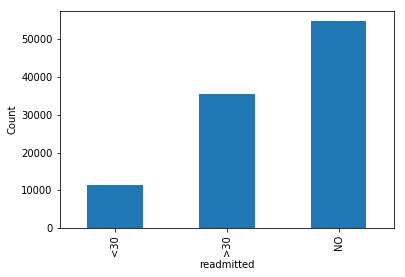

In [14]:
df.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')

In [15]:

df.groupby('discharge_disposition_id').size()

discharge_disposition_id
1     60234
2      2128
3     13954
4       815
5      1184
6     12902
7       623
8       108
9        21
10        6
11     1642
12        3
13      399
14      372
15       63
16       11
17       14
18     3691
19        8
20        2
22     1993
23      412
24       48
25      989
27        5
28      139
dtype: int64

In [16]:
df = df.loc[~df.discharge_disposition_id.isin([11,13,14,19,20,21])]

In [17]:
df.groupby('discharge_disposition_id').size()

discharge_disposition_id
1     60234
2      2128
3     13954
4       815
5      1184
6     12902
7       623
8       108
9        21
10        6
12        3
15       63
16       11
17       14
18     3691
22     1993
23      412
24       48
25      989
27        5
28      139
dtype: int64

In [18]:
len(df.columns)

50

In [19]:
df.groupby('readmitted').size()

readmitted
<30    11314
>30    35502
NO     52527
dtype: int64

In [20]:
print('Number of columns:',len(df.columns))

Number of columns: 50


In [21]:
df['OUTPUT_LABEL'] = (df.readmitted == '<30').astype('int')

In [22]:
def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))

In [23]:
print('Prevalence:%.3f'%calc_prevalence(df['OUTPUT_LABEL'].values))

Prevalence:0.114


In [24]:
print('Number of columns:',len(df.columns))

Number of columns: 51


In [25]:
df.info

<bound method DataFrame.info of         encounter_id  patient_nbr             race  gender       age weight  \
0            2278392      8222157        Caucasian  Female    [0-10)      ?   
1             149190     55629189        Caucasian  Female   [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female   [20-30)      ?   
3             500364     82442376        Caucasian    Male   [30-40)      ?   
4              16680     42519267        Caucasian    Male   [40-50)      ?   
5              35754     82637451        Caucasian    Male   [50-60)      ?   
6              55842     84259809        Caucasian    Male   [60-70)      ?   
7              63768    114882984        Caucasian    Male   [70-80)      ?   
8              12522     48330783        Caucasian  Female   [80-90)      ?   
9              15738     63555939        Caucasian  Female  [90-100)      ?   
10             28236     89869032  AfricanAmerican  Female   [40-50)      ?   
11             36900

In [26]:
df[list(df.columns)[:10]].head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1


In [27]:
df[list(df.columns)[10:20]].head()

,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2
0,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?
1,?,?,59,0,18,0,0,0,276,250.01
2,?,?,11,5,13,2,0,1,648,250
3,?,?,44,1,16,0,0,0,8,250.43
4,?,?,51,0,8,0,0,0,197,157


In [28]:
df[list(df.columns)[20:30]].head()

,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide
0,?,1,None,None,No,No,No,No,No,No
1,255,9,None,None,No,No,No,No,No,No
2,V27,6,None,None,No,No,No,No,No,No
3,403,7,None,None,No,No,No,No,No,No
4,250,5,None,None,No,No,No,No,No,No


In [29]:
df[list(df.columns)[30:40]].head()

,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide
0,No,No,No,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No,No,No,No
2,Steady,No,No,No,No,No,No,No,No,No
3,No,No,No,No,No,No,No,No,No,No
4,Steady,No,No,No,No,No,No,No,No,No


In [30]:
df[list(df.columns)[40:]].head()

,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,OUTPUT_LABEL
0,No,No,No,No,No,No,No,No,No,NO,0
1,No,Up,No,No,No,No,No,Ch,Yes,>30,0
2,No,No,No,No,No,No,No,No,Yes,NO,0
3,No,Up,No,No,No,No,No,Ch,Yes,NO,0
4,No,Steady,No,No,No,No,No,Ch,Yes,NO,0


In [31]:
# for each column
for c in list(df.columns):
    
    # get a list of unique values
    n = df[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<50:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

encounter_id: 99343 unique values
patient_nbr: 69990 unique values
race
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender
['Female' 'Male' 'Unknown/Invalid']
age
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id
[6 1 2 3 4 5 8 7]
discharge_disposition_id
[25  1  3  6  2  5  7 10  4 18  8 12 16 17 22 23  9 15 24 28 27]
admission_source_id
[ 1  7  2  4  5 20  6  3 17  8  9 14 10 22 11 25 13]
time_in_hospital
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
payer_code
['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty: 73 unique values
num_lab_procedures: 118 unique values
num_procedures
[0 5 1 6 2 3 4]
num_medications: 75 unique values
number_outpatient
[ 0  2  1  5  7  9  3  8  4 12 11  6 20 15 10 13 14 16 21 35 17 29 36 18
 19 27 22 24 

In [32]:
(df.isnull().sum())

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [33]:

# replace ? with nan
df = df.replace('?',np.nan)

In [34]:
cols_num = ['time_in_hospital','num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']

In [35]:
(df[cols_num].isnull().sum())

time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
dtype: int64

In [36]:
cols_cat = ['race', 'gender', 
       'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed','payer_code','medical_specialty']


In [37]:
(df[cols_cat].isnull().sum())

race                         2234
gender                          0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
troglitazone                    0
tolazamide                      0
insulin                         0
glyburide-metformin             0
glipizide-metformin             0
glimepiride-pioglitazone        0
metformin-rosiglitazone         0
metformin-pioglitazone          0
change                          0
diabetesMed                     0
payer_code                  39398
medical_specialty           48616
dtype: int64

In [38]:

df['race'] = df['race'].fillna('UNK')
df['payer_code'] = df['payer_code'].fillna('UNK')
df['medical_specialty'] = df['medical_specialty'].fillna('UNK')


In [39]:
print('Number medical specialty:', df.medical_specialty.nunique())
df.groupby('medical_specialty').size().sort_values(ascending = False)

Number medical specialty: 73


medical_specialty
UNK                                  48616
InternalMedicine                     14237
Emergency/Trauma                      7419
Family/GeneralPractice                7252
Cardiology                            5279
Surgery-General                       3059
Nephrology                            1539
Orthopedics                           1392
Orthopedics-Reconstructive            1230
Radiologist                           1121
Pulmonology                            854
Psychiatry                             853
Urology                                682
ObstetricsandGynecology                669
Surgery-Cardiovascular/Thoracic        642
Gastroenterology                       538
Surgery-Vascular                       525
Surgery-Neuro                          462
PhysicalMedicineandRehabilitation      391
Oncology                               319
Pediatrics                             253
Neurology                              201
Hematology/Oncology                 

In [40]:
top_10=['UNK','InternalMedicine','Emergency/Trauma',\
       'Family/GeneralPractice ','Cardiology','Surgery-General' ,\
          'Nephrology','Orthopedics',\
          'Orthopedics-Reconstructive','Radiologist']
# make a new column with duplicated data
df['med_spec'] = df['medical_specialty'].copy()

# replace all specialties not in top 10 with 'Other' category
df.loc[~df.med_spec.isin(top_10),'med_spec'] = 'Other'

In [41]:
df.groupby('med_spec').size()

med_spec
Cardiology                     5279
Emergency/Trauma               7419
InternalMedicine              14237
Nephrology                     1539
Orthopedics                    1392
Orthopedics-Reconstructive     1230
Other                         15451
Radiologist                    1121
Surgery-General                3059
UNK                           48616
dtype: int64

In [42]:
cols_cat_num = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

df[cols_cat_num] = df[cols_cat_num].astype('str')

In [43]:
df_cat = pd.get_dummies(df[cols_cat + cols_cat_num + ['med_spec']],drop_first = True)

In [44]:
df_cat.head()

,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_UNK,gender_Male,gender_Unknown/Invalid,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,...,admission_source_id_9,med_spec_Emergency/Trauma,med_spec_InternalMedicine,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,med_spec_UNK
0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
df = pd.concat([df,df_cat], axis = 1)

In [46]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,admission_source_id_9,med_spec_Emergency/Trauma,med_spec_InternalMedicine,med_spec_Nephrology,med_spec_Orthopedics,med_spec_Orthopedics-Reconstructive,med_spec_Other,med_spec_Radiologist,med_spec_Surgery-General,med_spec_UNK
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,0,0,0,0,0,0,1,0,0,0
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,0,0,0,0,0,0,0,0,0,1
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,0,0,0,0,0,0,0,0,0,1
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,0,0,0,0,0,0,0,0,0,1
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,0,0,0,0,0,0,0,0,0,1


In [47]:

cols_all_cat = list(df_cat.columns)

In [48]:

df[['age', 'weight']].head()

,age,weight
0,[0-10),NaN
1,[10-20),NaN
2,[20-30),NaN
3,[30-40),NaN
4,[40-50),NaN


In [49]:
df.groupby('age').size()

age
[0-10)        160
[10-20)       690
[20-30)      1649
[30-40)      3764
[40-50)      9607
[50-60)     17060
[60-70)     22059
[70-80)     25331
[80-90)     16434
[90-100)     2589
dtype: int64

In [50]:
age_id={'[0-10)':0,
        '[10-20)':1,
        '[20-30)':2,
        '[30-40)':3,
        '[40-50)':4,
        '[50-60)':50,
          '[60-70)':60, 
          '[70-80)':70, 
          '[80-90)':80, 
          '[90-100)':90
            }

        
        
         
           
    


In [51]:
df['age_group']=df.age.replace(age_id)

In [52]:
df.weight.notnull().sum()

3125

In [53]:

df['has_weight'] = df.weight.notnull().astype('int')

In [54]:

cols_extra = ['age_group','has_weight']

In [55]:
print('Total number of features:', len(cols_num + cols_all_cat + cols_extra))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))
print('Extra features:',len(cols_extra))

Total number of features: 214
Numerical Features: 8
Categorical Features: 204
Extra features: 2


In [56]:
df[cols_num + cols_all_cat + cols_extra].isnull().sum().sort_values(ascending = False).head(10)

has_weight         0
payer_code_MP      0
payer_code_MC      0
payer_code_HM      0
payer_code_FR      0
payer_code_DM      0
payer_code_CP      0
payer_code_CM      0
payer_code_CH      0
diabetesMed_Yes    0
dtype: int64

In [57]:
col2use = cols_num + cols_all_cat + cols_extra
df_data = df[col2use + ['OUTPUT_LABEL']]


In [58]:
# shuffle the samples
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)


In [59]:
# Save 30% of the data as validation and test data 
df_valid_test=df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.300


In [60]:
# Save 30% of the data as validation5and test data 
df_test=df_valid_test.sample(frac=0.50,random_state=42)
print('Split size: %.3f'%(len(df_test)/len(df_valid_test)))
df_valid = df_valid_test.drop(df_test.index)

Split size: 0.500


In [61]:
#training data set
df_train_all = df_data.drop(df_valid_test.index)

In [62]:
df_data.size

21358745

In [63]:

print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Test prevalence(n = 14902):0.117
Valid prevalence(n = 14901):0.113
Train all prevalence(n = 69540):0.113


In [64]:
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

all samples (n = 99343)


In [65]:

# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train balanced prevalence(n = %d):%.3f'%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))


Train balanced prevalence(n = 15766):0.500


In [66]:
df_train_all.to_csv('df_train_all.csv',index=False)
df_train.to_csv('df_train.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [67]:
X_train = df_train[col2use].values
X_train_all = df_train_all[col2use].values
X_valid = df_valid[col2use].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (69540, 214)
Training shapes: (15766, 214) (15766,)
Validation shapes: (14901, 214) (14901,)


In [68]:
df.groupby('OUTPUT_LABEL').size()


OUTPUT_LABEL
0    88029
1    11314
dtype: int64

In [69]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_all)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [70]:
import pickle
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [71]:

# load it back
scaler = pickle.load(open(scalerfile, 'rb'))

In [72]:
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [73]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    #F1_score=precision_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity

In [74]:
thresh = 0.5

# Performing Exploratory Data Analysis (EDA)

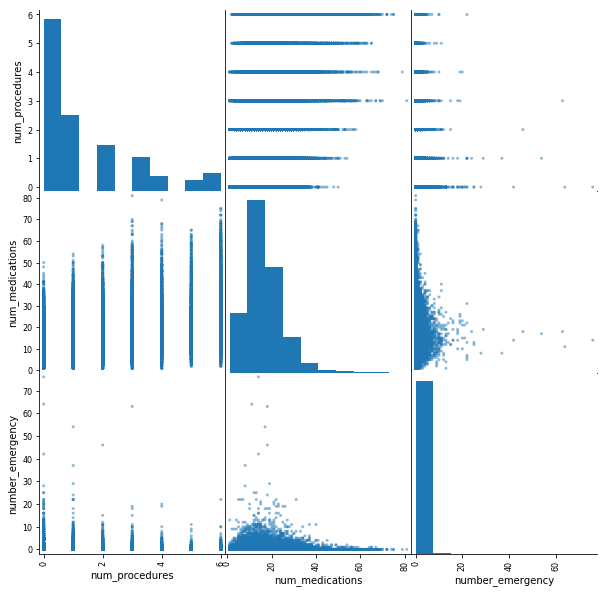

In [75]:
# Let's see the relationship between different variables to understand the data and if there is a strong correlation between 
#two variables then we can consider one of them.
import seaborn as sns
from pandas.plotting import scatter_matrix
sm = scatter_matrix(df[['num_procedures', 'num_medications', 'number_emergency']], figsize = (10, 10))
sns.despine()


From the above, we can see that there is no problem of multi-collinearity. We can also see that as the number_emergency increases the num_medication decreases.

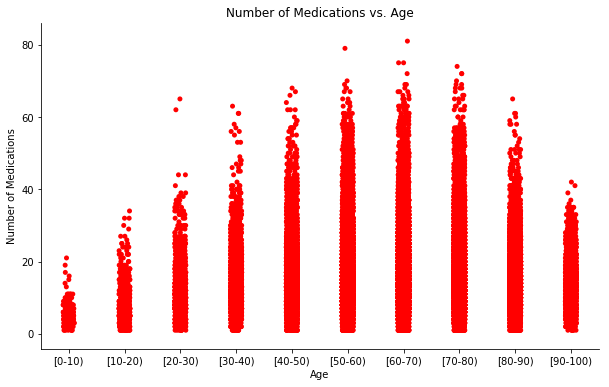

In [76]:
#Let's try to see how the age and number of medicines vary,
sortage = df.sort_values(by = 'age')
x = sns.stripplot(x = "age", y = "num_medications", data = sortage, color = 'red')
sns.despine() #remove top and right axes
x.figure.set_size_inches(10, 6)
x.set_xlabel('Age')
x.set_ylabel('Number of Medications')
x.axes.set_title('Number of Medications vs. Age')
plt.show()

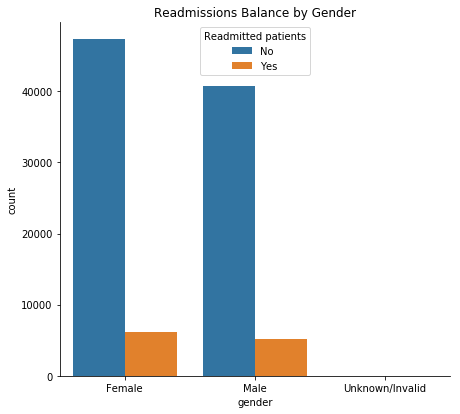

In [77]:
#Gender and Readmissions,
plot1 = sns.countplot(x = 'gender', hue = 'OUTPUT_LABEL' ,data = df) 
sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Gender')
plt.show()

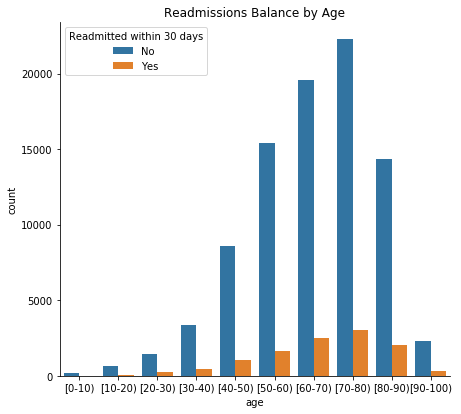

In [78]:

b = df.age.unique()
b.sort()
b_sort = np.array(b).tolist()


ageplt = sns.countplot(x = 'age', hue = 'OUTPUT_LABEL', data = df, order = b_sort) 

sns.despine()
ageplt.figure.set_size_inches(7, 6.5)
ageplt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
ageplt.axes.set_title('Readmissions Balance by Age')
plt.show()

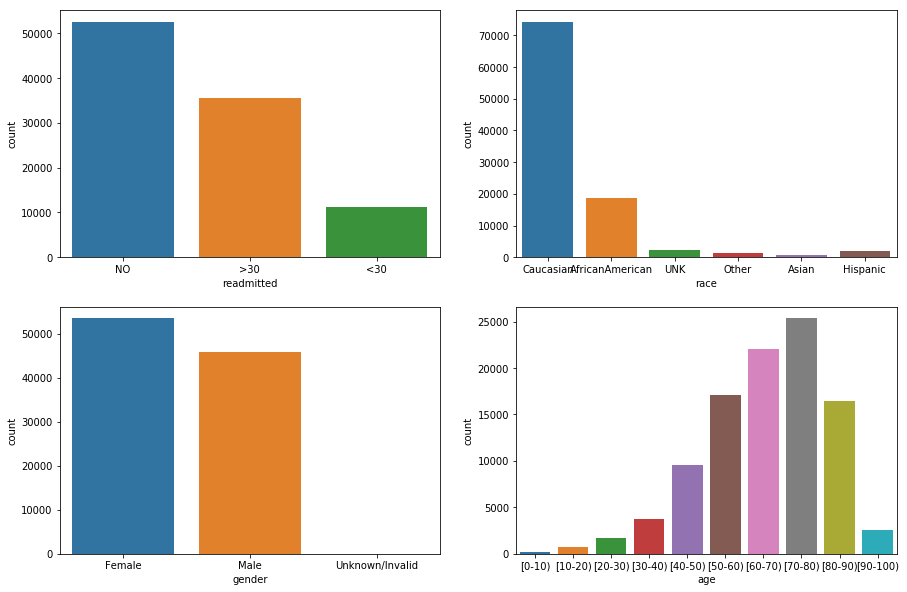

In [79]:
#Exploring the categorical variables,

import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10), ncols=2, nrows=2)

sns.countplot(x="readmitted", data=df, ax=ax[0][0])
sns.countplot(x="race", data=df, ax=ax[0][1])
sns.countplot(x="gender", data=df, ax=ax[1][0])
sns.countplot(x="age", data=df, ax=ax[1][1])

# Model Selection: baseline models¶
In this section, we will compare the performance of different machine learning models using default hyperparameters.

## K nearest neighbors (KNN)

In [80]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform')

In [84]:
Y_knn=knn.predict(X_valid_tf)

In [ ]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds_knn = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds_knn, thresh)

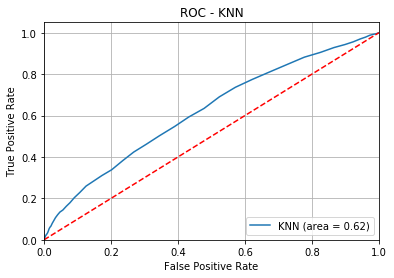

In [84]:
from sklearn.metrics import confusion_matrix,roc_curve, auc,roc_auc_score
roc_auc = roc_auc_score(y_valid, y_valid_preds_knn)
fp_rate, tp_rate, thresholds = roc_curve(y_valid, y_valid_preds_knn)
plt.figure()
plt.plot(fp_rate, tp_rate, label='KNN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - KNN')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [85]:
#Printing the confusion matrix,

print(confusion_matrix(y_valid, Y_knn))

[[9177 4039]
 [ 907  778]]


In [86]:
y_valid1=(y_valid>thresh)

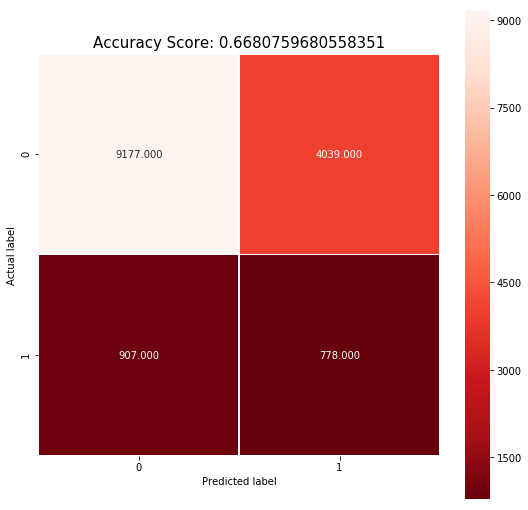

In [87]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_valid, Y_knn), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(knn.score(X_valid_tf , y_valid))
plt.title(all_sample_title, size = 15);

In [212]:
# Checking the summary of classification
from sklearn.metrics import classification_report
print(classification_report(y_valid, Y_knn, target_names = ['NO', 'YES']))

             precision    recall  f1-score   support

          0       0.91      0.69      0.79     13216
          1       0.16      0.46      0.24      1685

avg / total       0.83      0.67      0.73     14901



# Logistic Regression


In [226]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
Y_lr=lr.predict(X_valid_tf)

In [89]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds_lr= lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds_lr, thresh)

Logistic Regression
Training:
AUC:0.681
accuracy:0.629
recall:0.566
precision:0.648
specificity:0.692
prevalence:0.500
 
Validation:
AUC:0.661
accuracy:0.659
recall:0.560
precision:0.179
specificity:0.672
prevalence:0.113
 


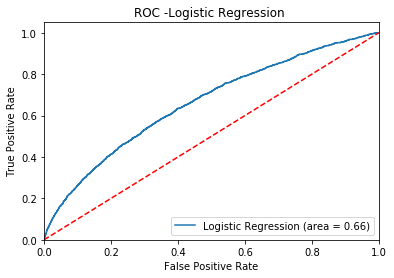

In [90]:
from sklearn.metrics import confusion_matrix,roc_curve, auc,roc_auc_score
roc_auc = roc_auc_score(y_valid, y_valid_preds_lr)
fp_rate, tp_rate, thresholds = roc_curve(y_valid, y_valid_preds_lr)
plt.figure()
plt.plot(fp_rate, tp_rate, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC -Logistic Regression ')
plt.legend(loc="lower right")
plt.show()

In [91]:
print(confusion_matrix(y_valid, Y_lr))

[[8883 4333]
 [ 741  944]]


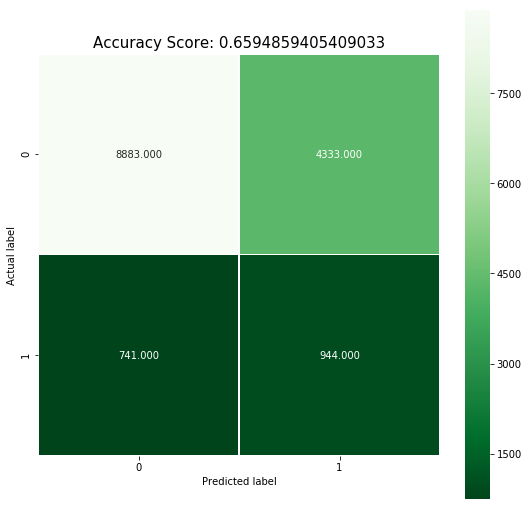

In [92]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_valid, Y_lr), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(lr.score(X_valid_tf , y_valid))
plt.title(all_sample_title, size = 15);

 When you have a lot of data logistic regression may take a long time to compute. There is an alternative approach called stochastic gradient descent that works similarly to logistic regression but doesn't use all the data at each iteration.

## Stochastic Gradient Descent Classifier

In [ ]:
Y_sgdc=sgdc.predict(X_valid_tf)

In [154]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds_sgdc = sgdc.predict_proba(X_valid_tf)[:,1]

print('Stochastic Gradient Descend')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity = print_report(y_valid,y_valid_preds_sgdc, thresh)

Stochastic Gradient Descend
Training:
AUC:0.679
accuracy:0.627
recall:0.561
precision:0.646
specificity:0.693
prevalence:0.500
 
Validation:
AUC:0.662
accuracy:0.661
recall:0.558
precision:0.179
specificity:0.674
prevalence:0.113
 


In [155]:
print(confusion_matrix(y_valid, Y_sgdc))

[[8908 4308]
 [ 745  940]]


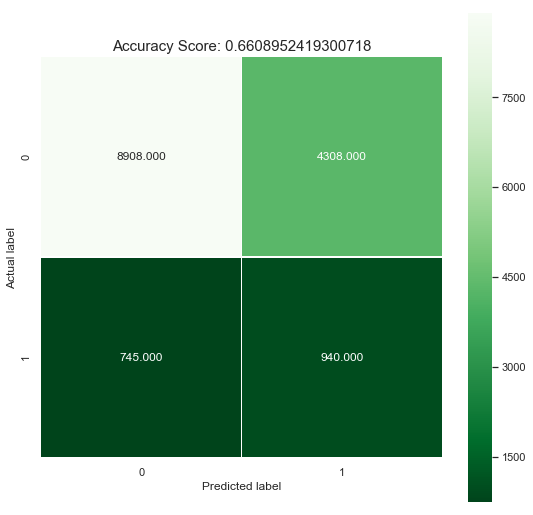

In [157]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_valid, Y_sgdc), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(sgdc.score(X_valid_tf , y_valid))
plt.title(all_sample_title, size = 15);

# Naive Bayes

In [228]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_tf, y_train)


GaussianNB(priors=None)

In [ ]:
Y_nb=nb.predict(X_valid_tf)

In [95]:
y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds_nb = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_valid,y_valid_preds_nb, thresh)


Naive Bayes
Training:
AUC:0.513
accuracy:0.511
recall:0.987
precision:0.506
specificity:0.035
prevalence:0.500
 
Validation:
AUC:0.509
accuracy:0.139
recall:0.982
precision:0.114
specificity:0.032
prevalence:0.113
 


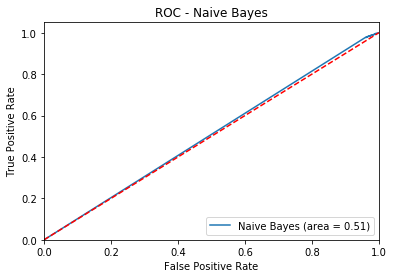

In [96]:
from sklearn.metrics import confusion_matrix,roc_curve, auc,roc_auc_score
roc_auc = roc_auc_score(y_valid, y_valid_preds_nb)
fp_rate, tp_rate, thresholds = roc_curve(y_valid, y_valid_preds_nb)
plt.figure()
plt.plot(fp_rate, tp_rate, label='Naive Bayes (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

In [97]:
print(confusion_matrix(y_valid, Y_nb))

[[  424 12792]
 [   31  1654]]


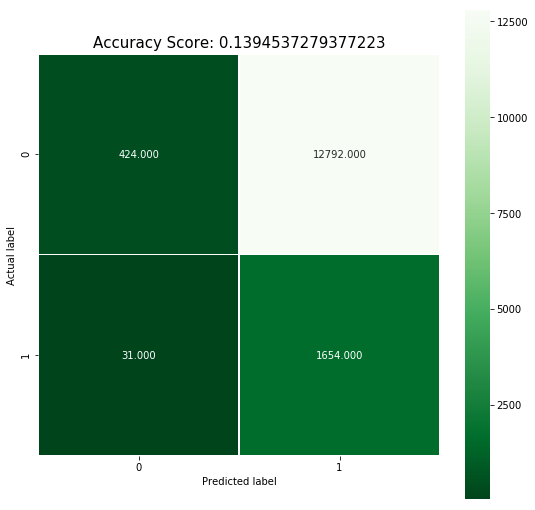

In [98]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_valid, Y_nb), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(nb.score(X_valid_tf , y_valid))
plt.title(all_sample_title, size = 15);

# Decision Tree

In [238]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [236]:
Y_tree=tree.predict(X_valid_tf)

In [100]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds_tree = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(y_valid,y_valid_preds_tree, thresh)

Decision Tree
Training:
AUC:0.734
accuracy:0.669
recall:0.603
precision:0.695
specificity:0.733
prevalence:0.500
 
Validation:
AUC:0.628
accuracy:0.657
recall:0.552
precision:0.176
specificity:0.667
prevalence:0.113
 


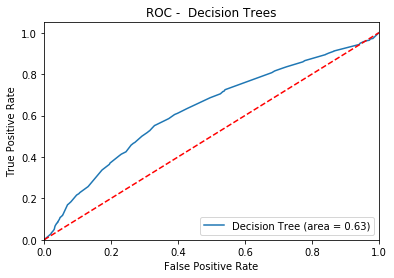

In [101]:
from sklearn.metrics import confusion_matrix,roc_curve, auc,roc_auc_score
roc_auc = roc_auc_score(y_valid, y_valid_preds_tree)
fp_rate, tp_rate, thresholds = roc_curve(y_valid, y_valid_preds_tree)
plt.figure()
plt.plot(fp_rate, tp_rate, label='Decision Tree (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC -  Decision Trees')
plt.legend(loc="lower right")
plt.show()

In [102]:
print(confusion_matrix(y_valid, Y_tree))

[[8855 4361]
 [ 755  930]]


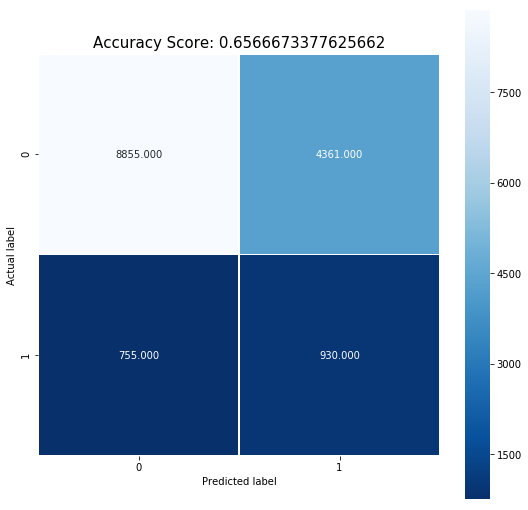

In [103]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_valid, Y_tree), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(tree.score(X_valid_tf , y_valid))
plt.title(all_sample_title, size = 15);

In [244]:
import graphviz
from IPython.display import Image
import pydotplus
from sklearn import tree
dot_dt_q2 = tree.export_graphviz(dte, out_file="dt_q2.dot", feature_names=X_train_tf.columns, max_depth=2, class_names=["No","Yes"], filled=True, rounded=True, special_characters=True)
graph_dt_q2 = pydotplus.graph_from_dot_file('dt_q2.dot')
Image(graph_dt_q2.create_png())

ModuleNotFoundError: No module named 'graphviz'

# Random Forest Classifier

In [239]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [ ]:
Y_rf=rf.predict(X_valid_tf)

In [105]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds_rf = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_preds_rf, thresh)

Random Forest
Training:
AUC:0.674
accuracy:0.627
recall:0.568
precision:0.643
specificity:0.685
prevalence:0.500
 
Validation:
AUC:0.641
accuracy:0.641
recall:0.555
precision:0.169
specificity:0.652
prevalence:0.113
 


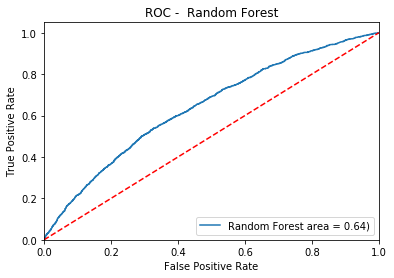

In [106]:
from sklearn.metrics import confusion_matrix,roc_curve, auc,roc_auc_score
roc_auc = roc_auc_score(y_valid, y_valid_preds_rf)
fp_rate, tp_rate, thresholds = roc_curve(y_valid, y_valid_preds_rf)
plt.figure()
plt.plot(fp_rate, tp_rate, label='Random Forest area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC -  Random Forest')
plt.legend(loc="lower right")
plt.show()

In [107]:
print(confusion_matrix(y_valid, Y_rf))

[[8614 4602]
 [ 750  935]]


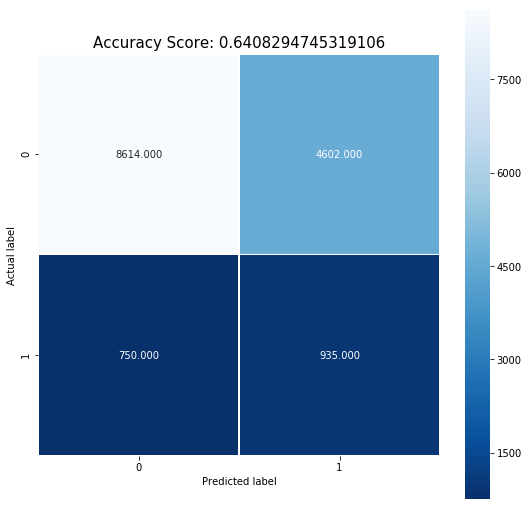

In [108]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_valid, Y_rf), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(rf.score(X_valid_tf , y_valid))
plt.title(all_sample_title, size = 15);

## Gradient Boosting Classifier

In [241]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [ ]:
Y_gbc=gbc.predict(X_valid_tf)

In [160]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds_gbc = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity = print_report(y_valid,y_valid_preds_gbc, thresh)

Gradient Boosting Classifier
Training:
AUC:0.772
accuracy:0.695
recall:0.673
precision:0.704
specificity:0.717
prevalence:0.500
 
Validation:
AUC:0.634
accuracy:0.618
recall:0.592
precision:0.166
specificity:0.622
prevalence:0.113
 


In [161]:
print(confusion_matrix(y_valid, Y_gbc))

[[8216 5000]
 [ 688  997]]


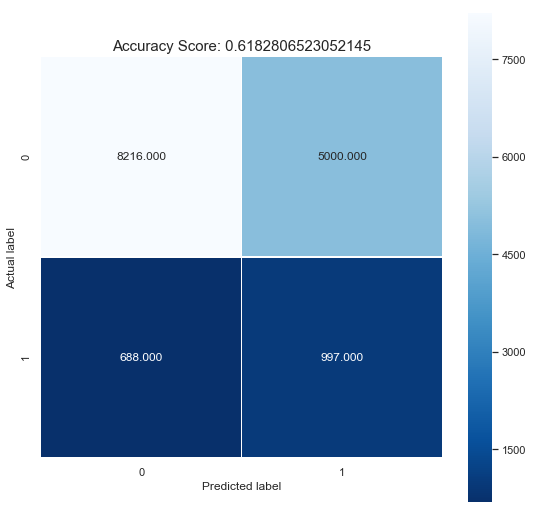

In [162]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_valid, Y_gbc), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(gbc.score(X_valid_tf , y_valid))
plt.title(all_sample_title, size = 15);

# Adaboost Classifier

In [240]:

#Creating a AdaBoosted Classification model,
from sklearn.ensemble import AdaBoostClassifier
adaclass = AdaBoostClassifier(n_estimators = 20, learning_rate = 0.2, random_state = 123)
adaclass.fit(X_train_tf, y_train)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.2, n_estimators=20, random_state=123)

In [ ]:
yadaclas = adaclass.predict(X_valid_tf)

In [110]:
#Checking the confusion matrix,
print(confusion_matrix(y_valid, yadaclas))

[[9106 4110]
 [ 780  905]]


In [111]:
y_train_preds = adaclass.predict_proba(X_train_tf)[:,1]
y_valid_preds_adaclass = adaclass.predict_proba(X_valid_tf)[:,1]

print('Adaboost Classifier')
print('Training:')
adaclass_train_auc, adaclass_train_accuracy, adaclass_train_recall, adaclass_train_precision, adaclass_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
adaclass_valid_auc, adaclass_valid_accuracy, adaclass_valid_recall, adaclass_valid_precision, adaclass_valid_specificity = print_report(y_valid,y_valid_preds_adaclass, thresh)

Adaboost Classifier
Training:
AUC:0.656
accuracy:0.610
recall:0.520
precision:0.634
specificity:0.699
prevalence:0.500
 
Validation:
AUC:0.654
accuracy:0.672
recall:0.537
precision:0.180
specificity:0.689
prevalence:0.113
 


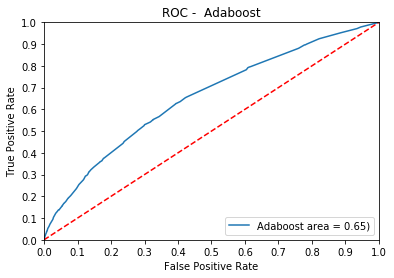

In [112]:
from sklearn.metrics import confusion_matrix,roc_curve, auc,roc_auc_score
roc_auc = roc_auc_score(y_valid, y_valid_preds_adaclass)
fp_rate, tp_rate, thresholds = roc_curve(y_valid, y_valid_preds_adaclass)
plt.figure()
plt.plot(fp_rate, tp_rate, label='Adaboost area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC -  Adaboost')
plt.legend(loc="lower right")
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.show()

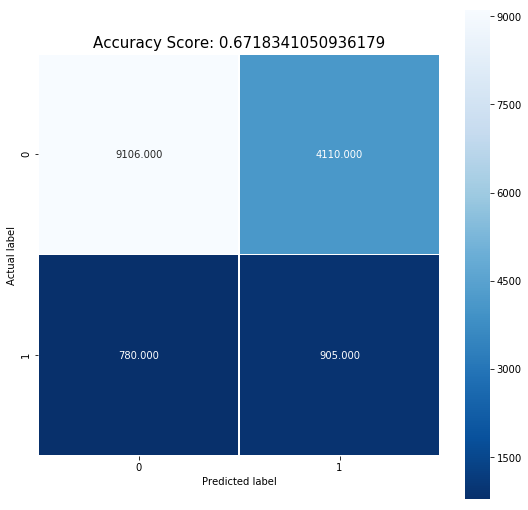

In [113]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_valid,yadaclas ), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(adaclass.score(X_valid_tf , y_valid))
plt.title(all_sample_title, size = 15);

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

In [277]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','NB','NB','DT','DT','RF','RF','AB','AB','SGDC','SGDC','GBC','GBC'],
                           'data_set':['train','valid']*8,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,adaclass_train_auc,adaclass_valid_auc,sgdc_train_auc,sgdc_valid_auc,gbc_train_auc,gbc_valid_auc],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,adaclass_train_accuracy,adaclass_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,gbc_train_accuracy,gbc_valid_accuracy],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,adaclass_train_recall,adaclass_valid_recall,sgdc_train_recall,sgdc_valid_recall,gbc_train_recall,gbc_valid_recall],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,adaclass_train_precision,adaclass_valid_precision,sgdc_train_precision,sgdc_valid_precision,gbc_train_precision,gbc_valid_precision],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,adaclass_train_specificity,adaclass_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,gbc_train_specificity,gbc_valid_specificity]})

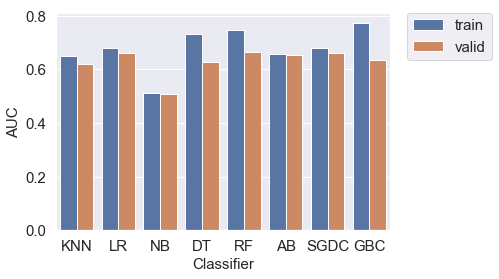

In [167]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

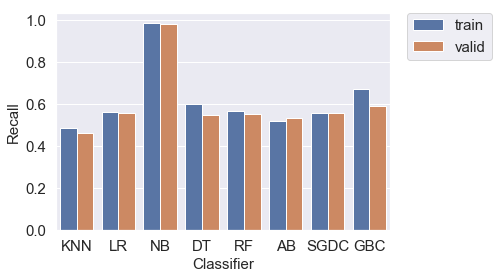

In [306]:
ax = sns.barplot(x="classifier", y="recall", hue="data_set", data=df_results)
#sns.color_palette()
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('Recall', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

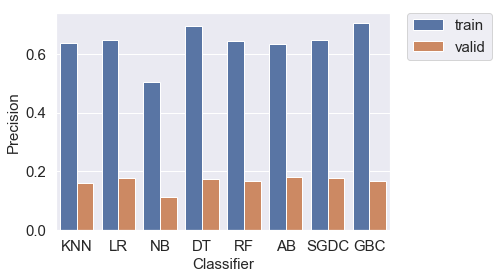

In [308]:
ax = sns.barplot(x="classifier", y="precision", hue="data_set", data=df_results)
#sns.color_palette()
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('Precision', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

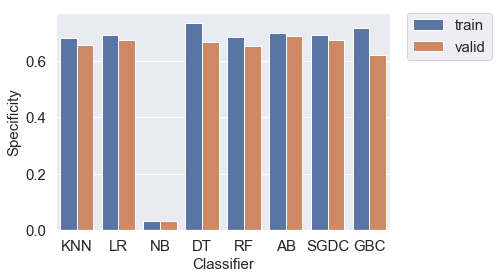

In [310]:
ax = sns.barplot(x="classifier", y="specificity", hue="data_set", data=df_results)
#sns.color_palette()
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('Specificity', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationW

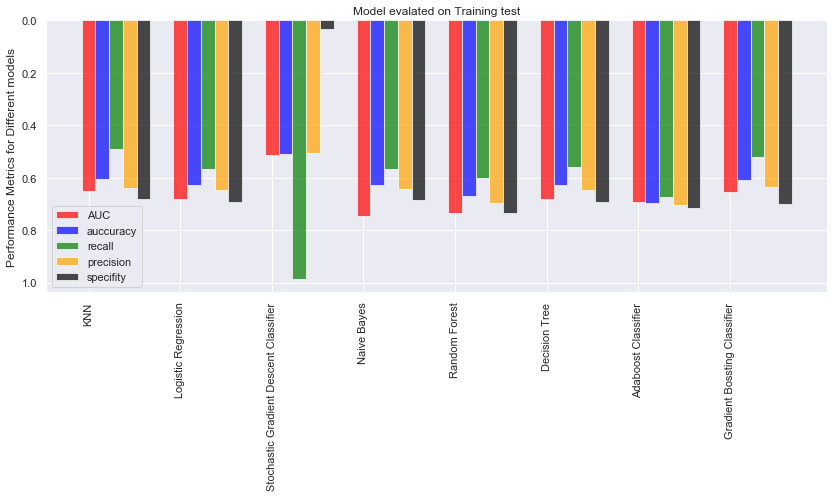

In [314]:
plt.figure(figsize=(14, 5))
ax = plt.subplot(111)

models = ['KNN','Logistic Regression','Stochastic Gradient Descent Classifier','Naive Bayes','Random Forest','Decision Tree','Adaboost Classifier','Gradient Bossting Classifier' ]
values = [knn_train_auc, lr_train_auc, nb_train_auc, rf_train_auc, tree_train_auc,sgdc_train_auc,gbc_train_auc,adaclass_train_auc]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'AUC')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['KNN','Logistic Regression','Stochastic Gradient Descent Classifier','Naive Bayes','Random Forest','Decision Tree','Adaboost Classifier','Gradient Bossting Classifier' ]
values = [knn_train_accuracy, lr_train_accuracy, nb_train_accuracy, rf_train_accuracy, tree_train_accuracy,sgdc_train_accuracy,gbc_train_accuracy,adaclass_train_accuracy]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'auccuracy')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['KNN','Logistic Regression','Stochastic Gradient Descent Classifier','Naive Bayes','Random Forest','Decision Tree','Adaboost Classifier','Gradient Bossting Classifier' ]
values = [knn_train_recall, lr_train_recall, nb_train_recall, rf_train_recall, tree_train_recall,sgdc_train_recall,gbc_train_recall,adaclass_train_recall]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)




ax = plt.subplot(111)
ax.invert_yaxis()
models = ['KNN','Logistic Regression','Stochastic Gradient Descent Classifier','Naive Bayes','Random Forest','Decision Tree','Adaboost Classifier','Gradient Bossting Classifier' ]
values = [knn_train_precision, lr_train_precision, nb_train_precision, rf_train_precision, tree_train_precision,sgdc_train_precision,gbc_train_precision,adaclass_train_precision]
model = np.arange(len(models))

plt.bar(model+0.45, values, align='center', width = 0.15, alpha=0.7, color = 'orange', label = 'precision')
plt.xticks(model, models,rotation=90)




ax = plt.subplot(111)

models = ['KNN','Logistic Regression','Stochastic Gradient Descent Classifier','Naive Bayes','Random Forest','Decision Tree','Adaboost Classifier','Gradient Bossting Classifier' ]
values = [knn_train_specificity, lr_train_specificity, nb_train_specificity, rf_train_specificity, tree_train_specificity,sgdc_train_specificity,gbc_train_specificity,adaclass_train_specificity]
model = np.arange(len(models))

plt.bar(model+0.60, values, align='center', width = 0.15, alpha=0.7, color = 'black', label = 'specifity')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model evalated on Training test')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationW

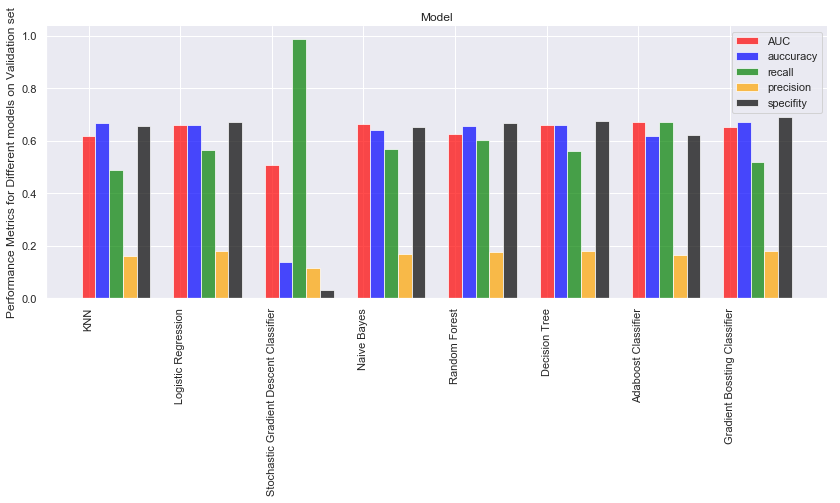

In [315]:
plt.figure(figsize=(14, 5))
ax = plt.subplot(111)

models = ['KNN','Logistic Regression','Stochastic Gradient Descent Classifier','Naive Bayes','Random Forest','Decision Tree','Adaboost Classifier','Gradient Bossting Classifier' ]
values = [knn_valid_auc, lr_valid_auc, nb_valid_auc, rf_valid_auc, tree_valid_auc,sgdc_valid_auc,gbc_valid_auc,adaclass_valid_auc]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'AUC')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['KNN','Logistic Regression','Stochastic Gradient Descent Classifier','Naive Bayes','Random Forest','Decision Tree','Adaboost Classifier','Gradient Bossting Classifier' ]
values = [knn_valid_accuracy, lr_valid_accuracy, nb_valid_accuracy, rf_valid_accuracy, tree_valid_accuracy,sgdc_valid_accuracy,gbc_valid_accuracy,adaclass_valid_accuracy]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'auccuracy')
plt.xticks(model, models)



ax = plt.subplot(111)

models = ['KNN','Logistic Regression','Stochastic Gradient Descent Classifier','Naive Bayes','Random Forest','Decision Tree','Adaboost Classifier','Gradient Bossting Classifier' ]
values = [knn_train_recall, lr_train_recall, nb_train_recall, rf_train_recall, tree_train_recall,sgdc_train_recall,gbc_train_recall,adaclass_train_recall]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)




ax = plt.subplot(111)

models = ['KNN','Logistic Regression','Stochastic Gradient Descent Classifier','Naive Bayes','Random Forest','Decision Tree','Adaboost Classifier','Gradient Bossting Classifier' ]
values = [knn_valid_precision, lr_valid_precision, nb_valid_precision, rf_valid_precision, tree_valid_precision,sgdc_valid_precision,gbc_valid_precision,adaclass_valid_precision]
model = np.arange(len(models))

plt.bar(model+0.45, values, align='center', width = 0.15, alpha=0.7, color = 'orange', label = 'precision')
plt.xticks(model, models,rotation=90)




ax = plt.subplot(111)

models = ['KNN','Logistic Regression','Stochastic Gradient Descent Classifier','Naive Bayes','Random Forest','Decision Tree','Adaboost Classifier','Gradient Bossting Classifier' ]
values = [knn_valid_specificity, lr_valid_specificity, nb_valid_specificity, rf_valid_specificity, tree_valid_specificity,sgdc_valid_specificity,gbc_valid_specificity,adaclass_valid_specificity]
model = np.arange(len(models))

plt.bar(model+0.60, values, align='center', width = 0.15, alpha=0.7, color = 'black', label = 'specifity')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models on Validation set')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()

In [168]:
fpr_knn, tpr_knn, thresholds = roc_curve(y_valid, y_valid_preds_knn)#knn
fpr_lr, tpr_lr, thresholds = roc_curve(y_valid, y_valid_preds_lr)#logistic regression
fpr_rf, tpr_rf, thresholds = roc_curve(y_valid, y_valid_preds_rf)#random forest classifier
fpr_adaclf, tpr_adaclf, thresholds = roc_curve(y_valid, y_valid_preds_adaclass)#Ada boost classifier
fpr_nb, tpr_nb, thresholds = roc_curve(y_valid,y_valid_preds_nb )#Hyperparameters Tunning for AdaBoosted
fpr_dt, tpr_dt, thresholds = roc_curve(y_valid,y_valid_preds_tree )#decision tree
fpr_sgdc, tpr_sgdc, thresholds = roc_curve(y_valid,y_valid_preds_sgdc )#decision tree
fpr_gbc, tpr_gbc, thresholds = roc_curve(y_valid,y_valid_preds_gbc )#decision tree
roc_auc_rf = roc_auc_score(y_valid, y_valid_preds_rf)
roc_auc_knn = roc_auc_score(y_valid, y_valid_preds_knn)
roc_auc_nb = roc_auc_score(y_valid, y_valid_preds_nb)
roc_auc_tree = roc_auc_score(y_valid, y_valid_preds_tree)
roc_auc_lr = roc_auc_score(y_valid, y_valid_preds_lr)
roc_auc_adaclass = roc_auc_score(y_valid, y_valid_preds_adaclass)
roc_auc_sgdc = roc_auc_score(y_valid, y_valid_preds_sgdc)
roc_auc_gbc = roc_auc_score(y_valid, y_valid_preds_gbc)

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0, 0.5, 'True Positive Rate')

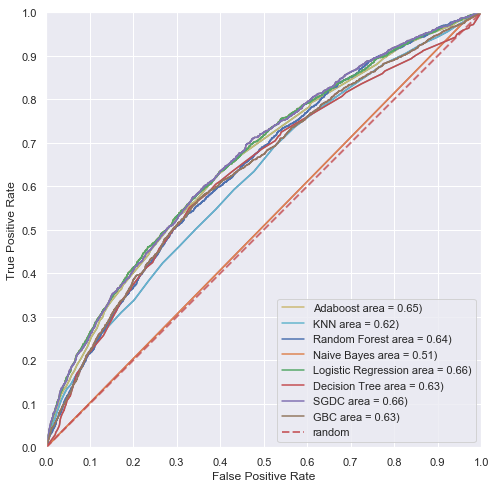

In [171]:

#compare the ROC curve between different models
plt.figure(figsize=(8,8))
plt.plot(fpr_knn, tpr_knn)
plt.plot(fpr_lr, tpr_lr)
plt.plot(fpr_adaclf, tpr_adaclf)
plt.plot(fpr_nb, tpr_nb)
plt.plot(fpr_rf, tpr_rf)
plt.plot(fpr_sgdc, tpr_sgdc)
plt.plot(fpr_gbc, tpr_gbc)
#plt.plot(fpr_adamod, tpr_adamod, label='Adaboost with the best Pars')
plt.plot(fpr_dt, tpr_dt)
plt.plot(fpr_adaclf, tpr_adaclf, label='Adaboost area = %0.2f)' % roc_auc_adaclass)
plt.plot(fpr_knn, tpr_knn, label='KNN area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_rf, tpr_rf, label='Random Forest area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes area = %0.2f)' % roc_auc_nb)
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree area = %0.2f)' % roc_auc_tree)
plt.plot(fpr_sgdc, tpr_sgdc, label='SGDC area = %0.2f)' % roc_auc_sgdc)
plt.plot(fpr_gbc, tpr_gbc, label='GBC area = %0.2f)' % roc_auc_gbc)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='random', alpha=.8)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
#plt.grid()
plt.legend()
plt.axes().set_aspect('equal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Model Selection: Learning Curve
We can diagnose how our models are doing by plotting a learning curve. In this section, we will make use of the learning curve code from scikit-learn's website with a small change of plotting the AUC instead of accuracy. http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html.

In [122]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

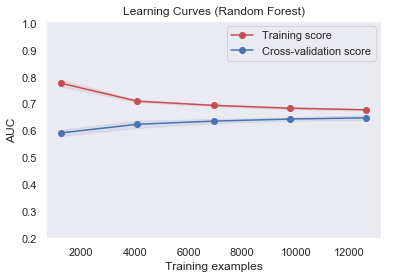

In [123]:
title = "Learning Curves (Random Forest)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier(max_depth = 6, random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()


In [247]:
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = col2use,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=True)

In [248]:
feature_importances.head(10)


,importance
medical_specialty_Family/GeneralPractice,-0.340793
nateglinide_No,-0.250629
nateglinide_Steady,-0.241247
pioglitazone_Steady,-0.211965
medical_specialty_Gynecology,-0.189600
acarbose_Steady,-0.176716
medical_specialty_ObstetricsandGynecology,-0.162099
acarbose_No,-0.151517
pioglitazone_No,-0.146205
medical_specialty_Cardiology,-0.139933


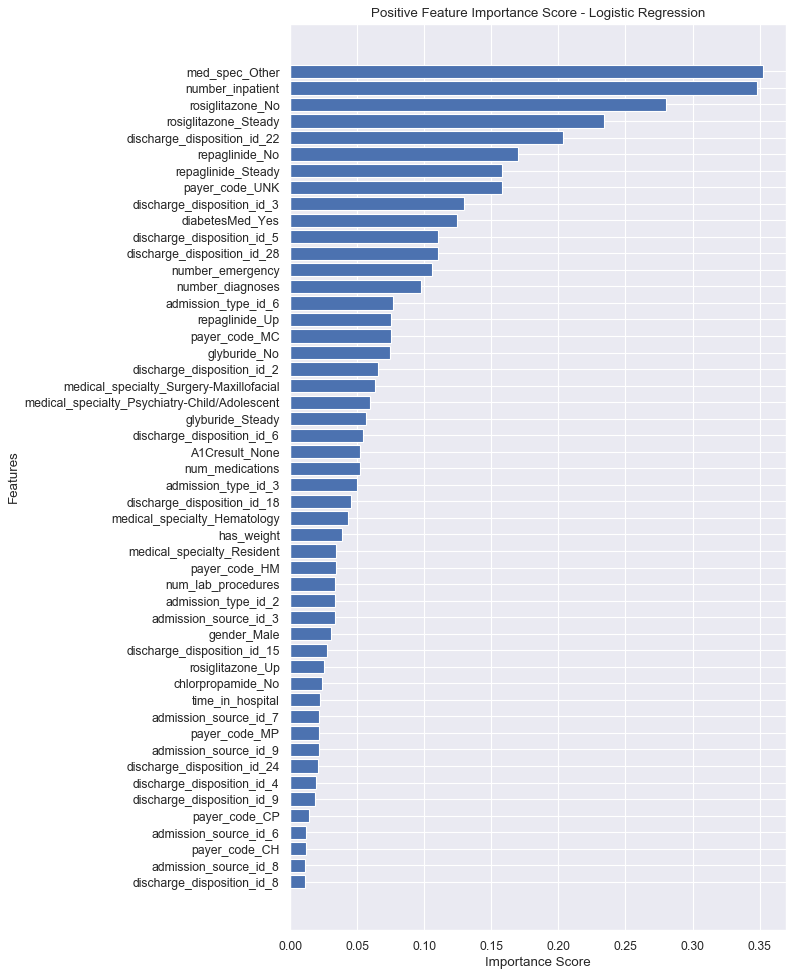

In [126]:
num = 50
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

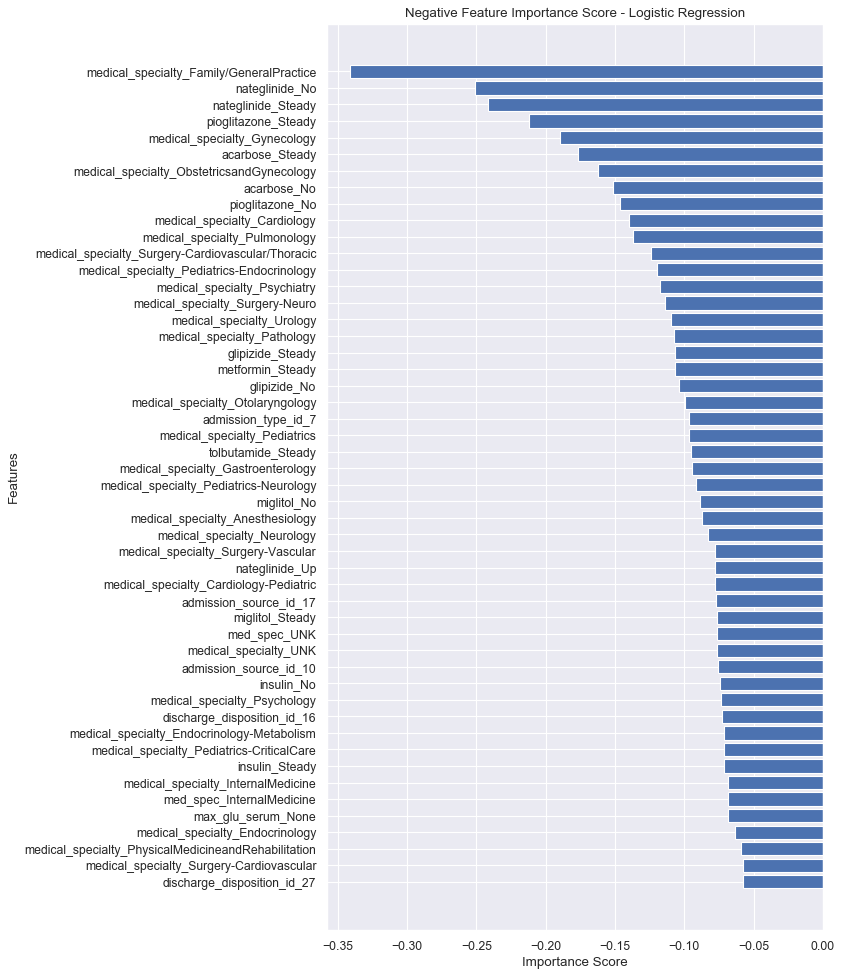

In [127]:

values_to_plot = feature_importances.iloc[-num:].values.ravel()
feature_labels = list(feature_importances.iloc[-num:].index)

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Negative Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

In [252]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = col2use,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [253]:
feature_importances.head(10)

,importance
number_inpatient,0.280212
discharge_disposition_id_22,0.082529
number_diagnoses,0.065160
num_medications,0.063708
time_in_hospital,0.060102
number_outpatient,0.045047
number_emergency,0.037178
num_lab_procedures,0.030113
insulin_No,0.027694
num_procedures,0.025334


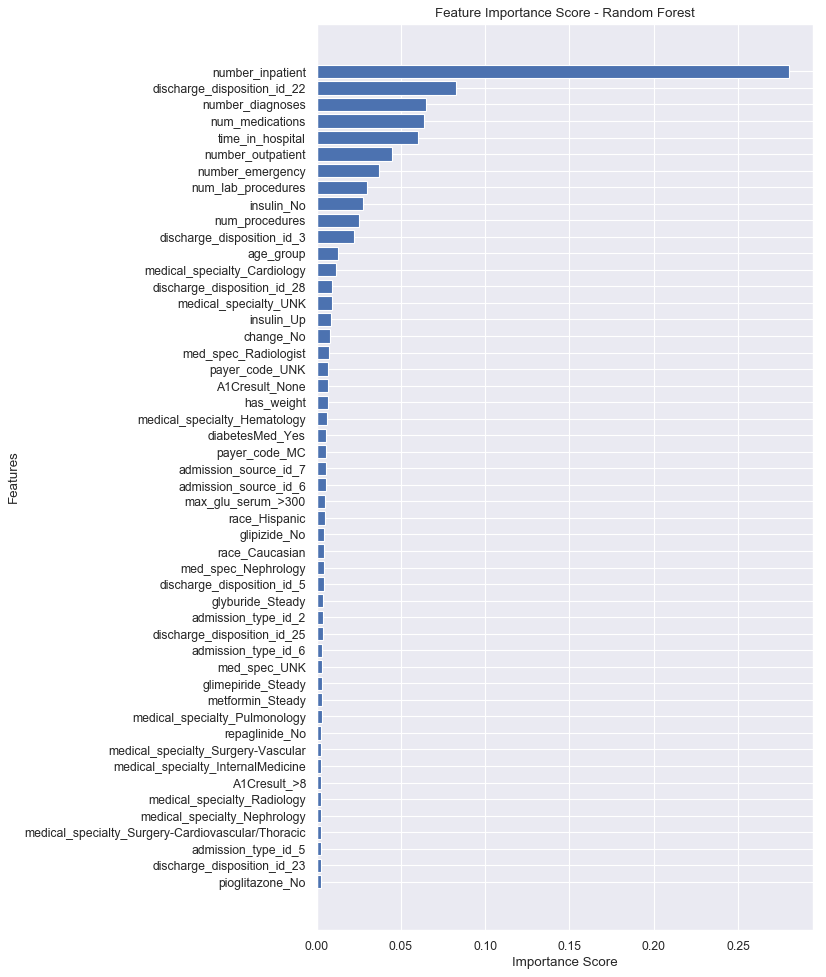

In [130]:
num = 50
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

 As you can see here, most of the important variables for random forest are continuous variables. This makes sense since you can split continuous variables more times than categorical variables.

## Feature Importance: Summary
After reviewing these plots, I got inspired to get some new data related to the most important features. For example, in both models the most important feature is number_inpatient, which is the number of inpatient visits in the last year. This means that if patients have been to the hospital in the last year they are more likely to be re-hospitalized again. This might inspire you to get (if you have it) more data about their prior admissions.Another example is discharge_disposition_id_22 which is used if a patient is discharged to a rehab facility. For your company, you might be able to research rules for being discharged to a rehab facility and add features related to those rules. Since most of the data analysts / data scientists won't have the deep domain knowledge. I probably would take a few of these features to other experts (e.g. doctors) and ask them about the medications.

In the case of high variance, one strategy is to reduce the number of variables to minimize overfitting. After this analyis, you could use the top N positive and negative features or the top N important random forest features. You might need to adjust N so that your performance does not drop drastically. For example, only using the top feature will likely drop the performance by a lot. Another strategy that you could use to reduce the number of variables is called PCA (principle component analysis). This is also implemented in scikit-learn if you are interested.

The last thing that I want to mention is that the feature importance plots may also point out errors in your predictive model. Perhaps, you have some data leakage in the cleaning process. Data leakage can be thought of as the process of accidentally including something in the training that allows the machine learning algorithm to artificially cheat. For example, I built a model based on the doctor's discharge notes. When I performed this same analysis on the most important words, I discovered that the top word for predicting someone would not be re-admitted was 'death'. This made me realize that I made a mistake and forgot to exclude patients who expired in the current hospital visit. Learning from my mistakes, I had you exclude the discharge codes related to death. Similar things can also happen when you merge datasets. Perhaps when you merged the datasets one of the classes ended up with nan for some of the variables. The analysis above will help you catch some of these cases.

## Model Selection: Hyperparameter tuning
The next thing that we should investigate is hyperparameter tuning. Hyperparameter tuning are essentially the design decisions that you made when you set up the machine learning model. For example, what is the maximum depth for your random forest? Each of these hyperparameters can be optimized to improve the model.

In this section, we will only optimize the hyper parameters for stochastic gradient descent, random forest and gradient boosting classifier. We will not optimize KNN since it took a while to train. We will not optimize Logistic regression since it performs similarly to stochastic gradient descent. We will not optimize decision trees since they tend to overfit and perform worse that random forests and gradient boosting classifiers.

one technique for hyperparameter tuning is called a Grid search where you test all possible combinations over a grid of values. This is very computationally intensive. The other option is to randomly test a permutation of them. This technique called Random Search is also implemented in scikit-learn. Most of this section is based on this medium blog post (https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)by William Koehrsen. 
we can get a list of the parameters inside a model with get_params. Here are the parameters in the random forest model. Wow there are so many of them!

In [131]:
rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [132]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(200,1000,200)
# maximum number of features to use at each split
max_features = ['auto','sqrt']
# maximum depth of the tree
max_depth = range(1,10,1)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(1, 10), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


To use the RandomizedSearchCV function, we need something to score or evaluate a set of hyperparameters. Here we will use the auc.

In [176]:
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

In [223]:
# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 5, scoring=auc_scoring,
                               verbose = 1, random_state = 42)

 Three important parameters of RandomizedSearchCV are

scoring = evaluation metric used to pick the best model
n_iter = number of different combinations
cv = number of cross-validation splits
increasing the last two of these will increase the run-time, but will decrease chance of overfitting. Note that the number of variables and grid size also influences the runtime. Cross-validation is a technique for splitting the data multiple times to get a better estimate of the performance metric. For the purposes of this tutorial, we will restrict to 2 CV to reduce the time.

In [224]:
# fit the random search model (this will take a few minutes)
t1 = time.time()
rf_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.2min finished


377.44798517227173


In [179]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'max_features': 'auto',
 'max_depth': 9,
 'criterion': 'gini'}

 Let's analyze the performance of the best model compared to the baseline model.

In [137]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Baseline Random Forest')
rf_train_auc_base = roc_auc_score(y_train, y_train_preds)
rf_valid_auc_base = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(rf_train_auc_base))
print('Validation AUC:%.3f'%(rf_valid_auc_base))

print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

rf_train_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_train_auc))
print('Validation AUC:%.3f'%(rf_valid_auc))

Baseline Random Forest
Training AUC:0.674
Validation AUC:0.641
Optimized Random Forest
Training AUC:0.746
Validation AUC:0.663


Optimize stochastic gradient descent

In [180]:
penalty = ['none','l2','l1']
max_iter = range(100,500,100)
alpha = [0.001,0.003,0.01,0.03,0.1,0.3]
random_grid_sgdc = {'penalty':penalty,
              'max_iter':max_iter,
              'alpha':alpha}
# create the randomized search cross-validation
sgdc_random = RandomizedSearchCV(estimator = sgdc, param_distributions = random_grid_sgdc, 
                                 n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, 
                                 random_state = 42)

t1 = time.time()
sgdc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

83.78665399551392


In [181]:
sgdc_random.best_params_

{'penalty': 'l2', 'max_iter': 100, 'alpha': 0.1}

In [182]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Baseline sgdc')
sgdc_train_auc_base = roc_auc_score(y_train, y_train_preds)
sgdc_valid_auc_base = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(sgdc_train_auc_base))
print('Validation AUC:%.3f'%(sgdc_valid_auc_base))
print('Optimized sgdc')
y_train_preds_random = sgdc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = sgdc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
sgdc_train_auc = roc_auc_score(y_train, y_train_preds_random)
sgdc_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(sgdc_train_auc))
print('Validation AUC:%.3f'%(sgdc_valid_auc))

Baseline sgdc
Training AUC:0.679
Validation AUC:0.662
Optimized sgdc
Training AUC:0.679
Validation AUC:0.662


 Optimize gradient boosting classifier

In [183]:
# number of trees
n_estimators = range(100,500,100)

# maximum depth of the tree
max_depth = range(1,5,1)

# learning rate
learning_rate = [0.001,0.01,0.1]

# random grid

random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

# create the randomized search cross-validation
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid_gbc,
                                n_iter = 20, cv = 2, scoring=auc_scoring,
                                verbose = 0, random_state = 42)


t1 = time.time()
gbc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

336.04998087882996


In [184]:
gbc_random.best_params_

{'n_estimators': 200, 'max_depth': 2, 'learning_rate': 0.1}

In [185]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Baseline gbc')
gbc_train_auc_base = roc_auc_score(y_train, y_train_preds)
gbc_valid_auc_base = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(gbc_train_auc_base))
print('Validation AUC:%.3f'%(gbc_valid_auc_base))

print('Optimized gbc')
y_train_preds_random = gbc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = gbc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
gbc_train_auc = roc_auc_score(y_train, y_train_preds_random)
gbc_valid_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(gbc_train_auc))
print('Validation AUC:%.3f'%(gbc_valid_auc))

Baseline gbc
Training AUC:0.772
Validation AUC:0.634
Optimized gbc
Training AUC:0.691
Validation AUC:0.672


In [186]:

df_results = pd.DataFrame({'classifier':['SGD','SGD','RF','RF','GB','GB'],
                           'data_set':['base','optimized']*3,
                          'auc':[sgdc_valid_auc_base,sgdc_valid_auc,
                                 rf_valid_auc_base,rf_valid_auc,
                                 gbc_valid_auc_base,gbc_valid_auc,],
                          })

In [263]:

df_results

,classifier,data_set,auc
0,SGD,base,0.662268
1,SGD,optimized,0.662137
2,RF,base,0.640833
3,RF,optimized,0.663166
4,GB,base,0.634114
5,GB,optimized,0.671838


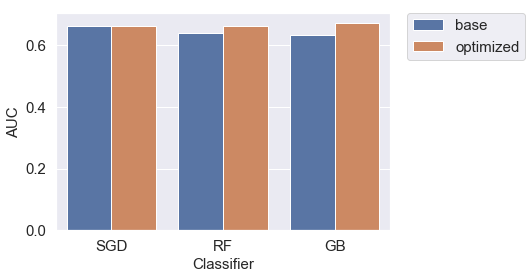

In [188]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()


We can see that the hyperparameter tuning improved the models, but not by much.

## Model Selection: Best Classifier
Here we will chose the gradient boosting classifier since it has the best AUC on the validation set. You won't want to train your best classifier every time you want to run new predictions. Therefore, we need to save the classifier. We will use the package pickle.

In [189]:
pickle.dump(gbc_random.best_estimator_, open('best_classifier.pkl', 'wb'),protocol = 4)

## Model Evaluation
Now that we have selected our best model. Let's evaluate the performance of the test set.

In [190]:
X_test = df_test[col2use].values
y_test = df_test['OUTPUT_LABEL'].values

scaler = pickle.load(open('scaler.sav', 'rb'))
X_test_tf = scaler.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [191]:
best_model = pickle.load(open('best_classifier.pkl','rb'))

In [192]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

In [193]:
thresh = 0.5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)

Training:
AUC:0.691
accuracy:0.640
recall:0.586
precision:0.657
specificity:0.694
prevalence:0.500
 
Validation:
AUC:0.672
accuracy:0.660
recall:0.583
precision:0.184
specificity:0.670
prevalence:0.113
 
Test:
AUC:0.668
accuracy:0.652
recall:0.582
precision:0.186
specificity:0.661
prevalence:0.117
 


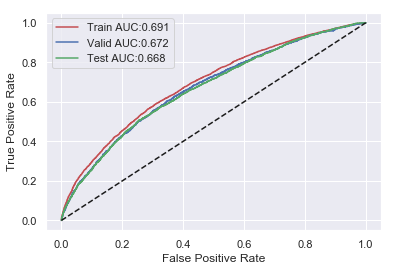

In [194]:
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Conclusion
Through this project, we created a binary classifier to predict the probability that a patient with diabetes would be readmitted to the hospital within 30 days. On held out test data, our best model had an AUC of of 0.67. Using this model, we are able to catch 58% of the readmissions from our model that performs approximately 1.5 times better than randomly selecting patients.